Цель

Реализовать классификацию сортов растения ирис (Iris Setosa - 0, Iris Versicolour - 1, Iris
Virginica - 2) по четырем признакам: размерам пестиков и тычинок его цветков.

Задачи

- Ознакомиться с задачей классификации
- Загрузить данные
- Создать модель ИНС
- Настроить параметры обучения
- Обучить и оценить модель

Импортируем необходимые для работы классы и функции. Кроме Keras понадобится
Pandas для загрузки данных и scikit-learn для подготовки данных и оценки модели.

In [31]:
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [32]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float) # входные данные
Y = dataset[:,4] # выходные данные

In [33]:
encoder = LabelEncoder() 
encoder.fit(Y) # загружаем выходные данные в энкодер
encoded_Y = encoder.transform(Y) # считаем количество вариантов 
dummy_y = to_categorical(encoded_Y) # разбиваем

In [34]:
model = Sequential() # есть один входной и один выходной тензор
model.add(Dense(4, activation='relu')) # обычные нейронные слои с разной
model.add(Dense(3, activation='softmax')) # функцией активации

In [35]:
model.compile( # создание модели
    optimizer='adam', # оптимизатор меняет веса исходя из функции потерь
    loss='categorical_crossentropy', # функция потерь используется для поиска ошибок в процессе обучения
    metrics=['accuracy'], # точность модели
)

In [36]:
first = model.fit(X, dummy_y, epochs=75, batch_size=10,
validation_split=0.1)

Epoch 1/75
14/14 [==============================] - 0s 11ms/step - loss: 1.0404 - accuracy: 0.3778 - val_loss: 1.6238 - val_accuracy: 0.0000e+00
Epoch 2/75
14/14 [==============================] - 0s 3ms/step - loss: 0.9333 - accuracy: 0.4148 - val_loss: 1.5506 - val_accuracy: 0.0000e+00
Epoch 3/75
14/14 [==============================] - 0s 3ms/step - loss: 0.8479 - accuracy: 0.4963 - val_loss: 1.4742 - val_accuracy: 0.0000e+00
Epoch 4/75
14/14 [==============================] - 0s 2ms/step - loss: 0.7769 - accuracy: 0.6074 - val_loss: 1.3606 - val_accuracy: 0.0000e+00
Epoch 5/75
14/14 [==============================] - 0s 3ms/step - loss: 0.7203 - accuracy: 0.6741 - val_loss: 1.2595 - val_accuracy: 0.0000e+00
Epoch 6/75
14/14 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.7259 - val_loss: 1.1873 - val_accuracy: 0.0000e+00
Epoch 7/75
14/14 [==============================] - 0s 3ms/step - loss: 0.6449 - accuracy: 0.7333 - val_loss: 1.1103 - val_accuracy: 0.

In [37]:
model1 = Sequential() 
model1.add(Dense(4, activation='relu')) 
model1.add(Dense(3, activation='softmax')) 
model1.compile( 
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
)
second = model1.fit(X, dummy_y, epochs=25, batch_size=10, # уменьшил кол-во эпох
validation_split=0.1)
model2 = Sequential() 
model2.add(Dense(4, activation='relu')) 
model2.add(Dense(3, activation='softmax')) 
model2.compile( 
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
)
third = model2.fit(X, dummy_y, epochs=75, batch_size=5, # уменьшил изменение весов
validation_split=0.1)
model3 = Sequential() 
model3.add(Dense(4, activation='relu')) 
model3.add(Dense(8, activation='relu')) # добавил еще один слой нейронов
model3.add(Dense(3, activation='softmax'))
model3.compile( 
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
)
fourth = model3.fit(X, dummy_y, epochs=75, batch_size=10, 
validation_split=0.1)

Epoch 1/25
14/14 [==============================] - 0s 12ms/step - loss: 1.4192 - accuracy: 0.3704 - val_loss: 1.8024 - val_accuracy: 0.0000e+00
Epoch 2/25
14/14 [==============================] - 0s 2ms/step - loss: 1.3054 - accuracy: 0.3704 - val_loss: 1.6547 - val_accuracy: 0.0000e+00
Epoch 3/25
14/14 [==============================] - 0s 2ms/step - loss: 1.2226 - accuracy: 0.3704 - val_loss: 1.5239 - val_accuracy: 0.0000e+00
Epoch 4/25
14/14 [==============================] - 0s 2ms/step - loss: 1.1597 - accuracy: 0.3704 - val_loss: 1.4264 - val_accuracy: 0.0000e+00
Epoch 5/25
14/14 [==============================] - 0s 2ms/step - loss: 1.1110 - accuracy: 0.3704 - val_loss: 1.3419 - val_accuracy: 0.0000e+00
Epoch 6/25
14/14 [==============================] - 0s 2ms/step - loss: 1.0752 - accuracy: 0.3704 - val_loss: 1.2661 - val_accuracy: 0.0000e+00
Epoch 7/25
14/14 [==============================] - 0s 2ms/step - loss: 1.0401 - accuracy: 0.3704 - val_loss: 1.2219 - val_accuracy: 0.

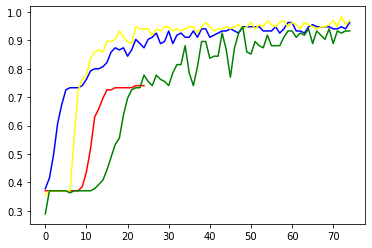

In [38]:
plt.plot(first.history['accuracy'], color='blue')
plt.plot(second.history['accuracy'], color='red')
plt.plot(third.history['accuracy'], color='yellow')
plt.plot(fourth.history['accuracy'], color='green')
plt.show()